# A/B Testing  

This notebook contains my notes on A/B Testing from Udacity's free online course as well as books like Lean Analytics, Lean Product Playbook and Trustworthy Online Experiments: A Practical Guide to A/B Testing (TOE). 

## Definition:

In simple terms, **A/B tests** or **Online Controlled Experiments (OCEs)** are mechanisms to test new product features, backend changes, UI changes or any strategic decisions by implementing the change only on a subset of users, comparing it to the status quo or other alternatives and analyzing the effect on chosen metrics to determine the impact before officially rolling it out. 

A/B Tests are best used when introducing enhancements or improvements to products with an existing user base (an available population to conduct tests on). Introduction of new products could benefit more from qualitative methods like consumer interviews and surveys. 

## Some considerations before using A/B Testing on your product:

Before deciding whether to use A/B testing in your own business, it would be a good idea to ask these questions:

- Do you have an **experimental unit** to test on? - like users, cookies, etc. 
- Do you have enough units to test on? - TOE recommends thousands of experimental units for the experiment to be useful.
- Do you have a key metric(s), aka **Overall Evaluation Criteria**? - a goal that is agreed upon and can be practically evaluated. 
- Are the changes you want to test easy to make? - you would need to weigh the costs of making software changes against the benefits potentially realised from the test.
- For UX testing - do you have repeat users whose experience (in terms of satisfaction, engagement, etc) can be significantly evaluated or improved? - testing impact of changes on engagement for one-off purchase websites like home rentals may not be as effective as say a social network or e-commerce site. 

## Components of an A/B Test:

TOE defines the components of an A/B test as follows:

- **_Parameter_**: Aka experimental variable/factor. This is what determines the difference between the A and B groups of your test. In case of a simple UI change to the colour of the checkout button, the parameter can be defined as colour. The original colour is often assigned to group A - known as the **Control Group** and the new colour(s) are assigned the the other groups - known as the **Treatment(s)**. Often times, multiple variations of the parameter are tested in a single test in a process known as **Multivariate testing** 


- **_Variant_**: This is simply another name for the group assignment - Treatment vs Control or A/B/C... It is a function of the parameter or experimental variable. The distinction between parameter and variant is more apparent when there are 2 or more experimental variables interacting. For example if we are testing for both colour and shape (m and n of each) of a button, we have 2 parameters - colour and shape. We have m times n variants - each combination of colour and shape. 


- **_Randomization Unit_**: This is also often called the _unit of diversion_. It is the unit on which a group (Treatment or Control) is randomly assigned. The most common unit (especially for user visible changes) is user id. However, for some non user visible (like backend changes) cookie or page view based diversion may also be applied. 



## Metrics

Choosing the right metric is so important because it is the link between the analysis of an A/B test and strategic decision making. If a metric is not chosen wisely it could lead the business in the wrong direction. 

Ideal metrics have the following characteristics:

- Easy to understand 
- Can be computed with given data 
- Measured in short term but are a proxy for long term success
- Normalised as per user/ per event rather than absolute values 

Sometimes we can combine metrics into what is called an **Overall Evaluation Criteria** (OEC) that ultimately drives decision making. 

[Lean Analytics](http://leananalyticsbook.com/) is a great book that is all about these metrics. It contains a ton of information on picking the right metrics for different types of businesses (e-commerce, SaaS, user generated content, etc. ) and at different stages of growth. 

## Statistics for Online Controlled Experiments 

In the this section notebook, I will go through some of the common statistical methods involved in planning and analysing A/B Tests as well as some snippets of code used to obtain results.

### Sizing and Power Analysis 

In order for us to make robust decisions based on A/B Tests, we must make sure that the numbers we observe in the test are reliable. The **power** of a test is defined as the probability that we will observe a significant difference in the metric between test groups given there actually exists such a difference. Having a high enough power means that we are not missing out on significant differences (even if they are small). How "powerful" a test is is dependent on the sample size.

Another important concept while considering power and sizing is the **minimum detectable effect (MDE)**, aka **practical significance level**. This is the change in the metric we would like to see for it to actually have some impact on our business. If we think that a 2% absolute change in click-through-rate as a result of a change in shape of a button makes it worth implementing, then this is our MDE. It can be specified both in absolute or in relative terms. In order for this to make sense, we must also specify our **baseline** probability or the expected value of the metric in the Control group. 

Finally the concepts of **statistical significance** or **confidence level** from hypothesis testing applies directly to A/B tests as well. 

Having determined these factors, the sample size can be calculated using a formula specified in various statistics text books. 



Here is the R code to calculate the sample size given some parameters. 


In [64]:
#Sample Size Calculations 

#inputs 
power <- 80
conflevel <- 95
baseline <- 8
effectsize <- 2
relative <- F

#function to calculate sample size 
sample_size <- function(power, conflevel, baseline, effectsize, relative){
    if (relative == T){
        effectsize <- (effectsize/100)*(baseline)
    }
    else {
        effectsize <- effectsize
    }
    p1 <- baseline/100
    p2 <- p1 - effectsize/100
    p <- (p1+p2)/2
    q <- 1 - p
    q1 <- 1 - p1
    q2 <- 1 - p2
    alpha <- 1 - conflevel/100
    n <- (sqrt(p*q*(2))*qnorm(1-alpha/2) + sqrt(p1*q1 + p2*q2)*qnorm(power/100))^2/(effectsize/100)^2
    return(round(n))
}

In [65]:
sample_size(power, conflevel, baseline, effectsize, relative)

[1] 2554

More information about the formula used here can be found in this [article](https://towardsdatascience.com/required-sample-size-for-a-b-testing-6f6608dd330a) published by Towards Data Science. There are also various online sample size calculators that provide close estimates. 

- [Optimizely](https://www.optimizely.com/sample-size-calculator/)
- [EvanMiller.org](https://www.evanmiller.org/ab-testing/sample-size.html)

I have also created my own sample size calculator on RShiny which can be accessed by running runGitHub( "A-B-Testing-Toolkit", "preranahiriyur") on RStudio with RShiny package installed. 


This VWO [article](https://vwo.com/blog/how-to-calculate-ab-test-sample-size/) explains a few ways to calculate sample sizes. 
                                                                        

### Statistical distributions 

Depending on the randomization unit and what we're measuring, we may observe different statistical distributions in our data. For example, while measuring click-through-probability, we might assume that the variable follows a _Binomial Distribution_ with x = 1 if clicked and x = 0 if not. 

The table below mentions the statistical distributions

| Metric | Distribution | 
| --- | --- | 
| Probability | Binomial (Approx normal for large sample) | 
| Mean | Normal (Central Limit Theorem) |
| Rates | Poisson |
| Counts | Maybe Normal |

In case you are interested in the properties of some of these distributions, you may find this [article](https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/#:~:text=Any%20distribution%20is%20known%20as,under%20the%20curve%20is%201) useful.


### Hypothesis testing 

Knowing the properties of the underlying distribution of the data can help inform analysis. If the data is approximately normally distributed or has asymptotically normal properties, then we can use a simple hypothesis test. 

A hypothesis test has the following components:

- **Null hypothesis** ($H_0$): An assumption or a statement you would like to test against. It is often stated as an equality, say that the click-through-rate for groups A and B are equal. 

- **Alternative hypothesis**: This is what we would like to prove, often stated as the opposite of the null. In this case it could be that the click-through-rate in group B is simply not equal to A. We could also say the former is greater than or lesser than the latter. All of these are valid alternative hypotheses. 

- **Test statistic**: This is a function of the observed value of the metric on our data. It is used together with the critical value to make a decision about the null and alternative hypotheses. 

- **Critical value**: This is a cut-off value based on our Null hypothesis and assumptions about the underlying distribution of the data. We tend to **reject** the null when our test statistic exceeds this value. 

- **p-value**: This is the probability of observing something similar to or more extreme than the metric we have observed given our assumption that the null hypothesis is true. A low p-value means that it is unlikely we may have oberved this value for the metric if the null were true, suggesting we reject the null. A high p-value means that it is highly probable that we observe such a value for the metric given the null and there we are unable to reject it. 


As an example of a simple hypothesis test, I will use data from Kevin Hillstrom's MineThatData E-Mail Analytics And Data Mining Challenge. More info on the data can be found [here](https://blog.minethatdata.com/2008/03/minethatdata-e-mail-analytics-and-data.html?m=1)



In [66]:
email_data <- read.csv("Kevin_Hillstrom_MineThatData_E_MailAnalytics_DataMiningChallenge.csv", header=T)
head(email_data, 5)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>
1,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0
2,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0
3,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0
4,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0
5,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0


In [67]:
#Let's do an A/B Test to see if the visit rate among Men's E-Mail Campaign receivers and No-Email Campaign receivers are equal

no_email <- nrow(email_data[email_data$segment=="No E-Mail", ])
mens_email <- nrow(email_data[email_data$segment=="Mens E-Mail", ])
no_email_visit <- nrow(email_data[email_data$segment=="No E-Mail" & email_data$visit == 1, ])
mens_email_visit <- nrow(email_data[email_data$segment=="Mens E-Mail" & email_data$visit == 1, ])

x <- c(no_email_visit, mens_email_visit)
n <- c(no_email, mens_email)

prop.test(x,n, correct=F)


	2-sample test for equality of proportions without continuity
	correction

data:  x out of n
X-squared = 505.62, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.08322563 -0.06995350
sample estimates:
   prop 1    prop 2 
0.1061673 0.1827568 


The results above tell us that the p-value for this test is less than 2.2e-16 which is very small. The default null is that the visit rates are equal which we can reject based on this p-value. 

##### Non-parametric methods

Sometimes our metrics may be defined as ratios or medians, that may not follow a common statistical distribution. Using the properties of some distribution in these cases may lead to wrong analysis. In such scenarios where we cannot be sure of the underlying distribution of our data, it is recommended to use **Non-parametric** methods such as the Wilcoxon signed rank test or the Mann-Whitney test to test hypotheses. 

In [68]:
#Try running
#help("wilcox.test")

### Variability 

An important concept in A/B testing is variability of the metric we are trying to analyse. The variability of our metric affects our analysis by affecting the power. The sample size required to generate reliable results increases with the variance of the metric. In our above power analysis, we have implicitly assumed the variability of the difference in proportions based on the underlying distribution of the data - binomial. This is determined by a formula and is called the **_analytical variance_**. Sometimes this is a good approximation of the variance and at other times it could be completely off. An alternative to making such assumptions about the variability is using what is called the **_empirical variance_**, which as the name suggests is empirically computed from available data. Computing the empirical variance can be done using A/A tests or Bootstrap sampling discussed below. 

 
- **A/A Tests**: An A/A test is simply testing the two groups for any differences without actually assigning any variation. This is often done for many reasons - to check if the groups are similar prior to assigning treatments so that our experiment results aren't compromised, or to compute the variance of the metric empirically. By conducting an A/A/n test or splitting our data into many samples, we can compute the metric on each and then compute the variance. 


- **Bootstrap sampling**: 



Here is a simple example of how bootstrap sampling can be used to empirically estimate the variance. 

[1] "Analytical Variance =  0.001"
[1] "Empirical Variance =  0.0010782774765286"


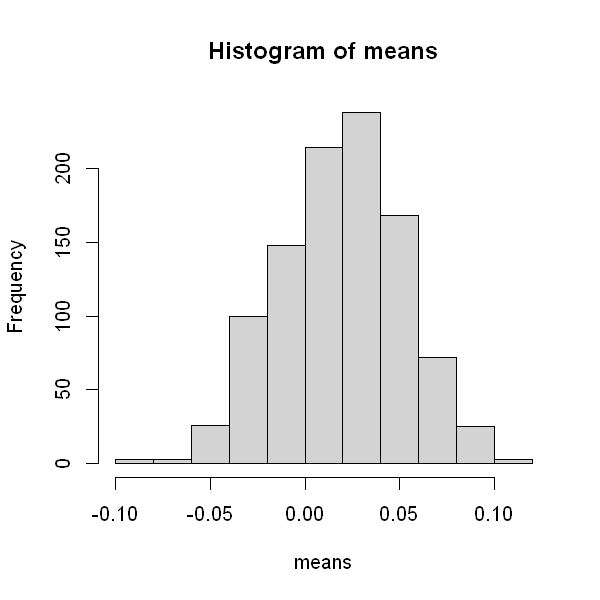

In [69]:
#Example of empirically estimating the variance using Bootstrap 

#generate random normal dist with mu and sigma
x <- rnorm(1000)
#analytical variance of mean ==> sigma/sqrt(n)
an_var <- 1/1000
#bootstrap 
B <- 1000 #number of bootstrap samples 
size <- 1000
means <- numeric(B) #initializing a vector to store the means of each sample

for (b in 1:B){
    i <- sample(1:size, size=size, replace=TRUE)
    xb <- x[i]
    means[b] <- mean(xb)
}

em_var <- var(means)

options(repr.plot.width=5, repr.plot.height=5)
print(paste('Analytical Variance = ', an_var))
print(paste('Empirical Variance = ', em_var))

hist(means)

We can see that the analytical variance and empirical variance are very similar. Also the distribution of the bootstrap means is similar to the analytical distribution as expected (normal with mean $\mu = 0$ and variance $\sigma^2 = 1$)

The usefulness of the bootstrap method is more apparent when the data does not follow a common distribution like the normal above. For example if our data was generated by some unknown process like below:

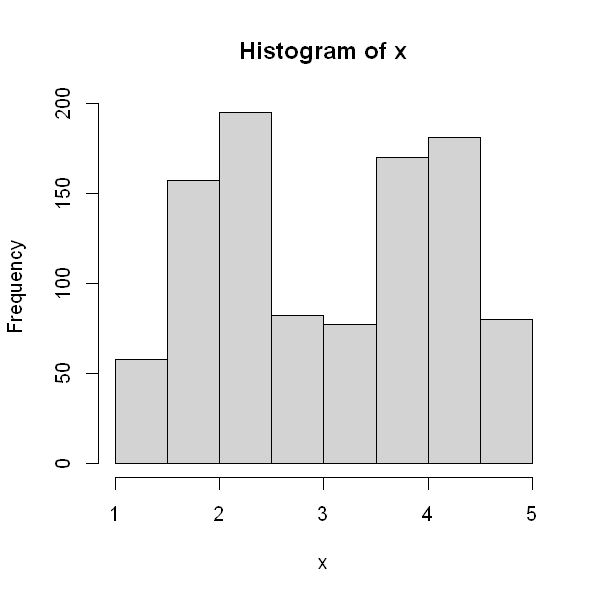

In [70]:
#Example of empirically estimating the variance using Bootstrap 
suppressWarnings(install.packages("truncnorm"))
library(truncnorm)
#generate bimodal truncated normal distribution
x <- c(rtruncnorm(500, a=1, b=5, mean=2, sd=.5), rtruncnorm(500, a=1, b=5, mean=4, sd=.5))

hist(x)

In this case we may choose not to use the mean but instead the median or the 1st and 3rd quartile. Each of these do not follow any known analytical distribution and therefore we have to estimate the variability empirically. 

[1] "Empirical Variance of median =  0.0195237360325098"
[1] "Empirical Variance of Q1 =  0.000616171502652487"
[1] "Empirical Variance of Q3 =  0.00121838183192465"


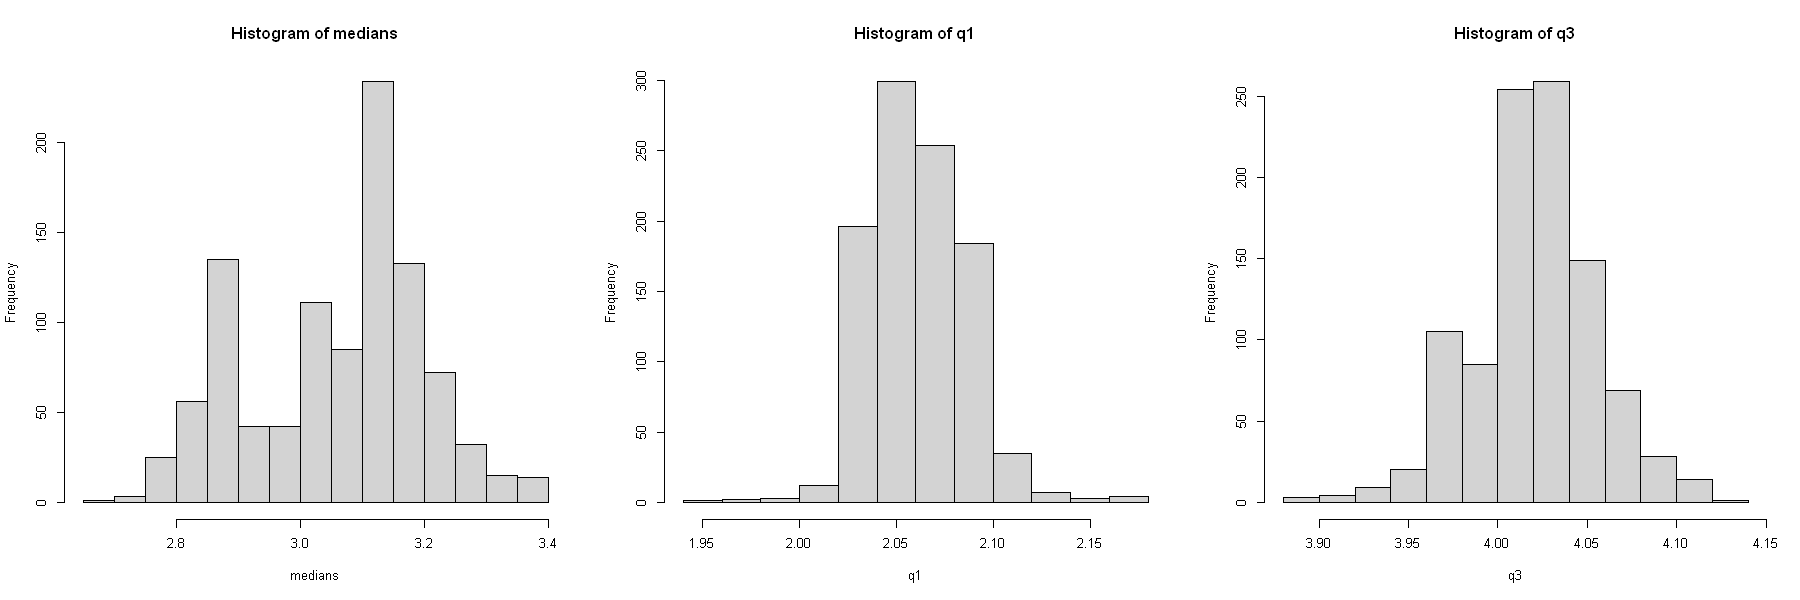

In [71]:
#bootstrap 
B <- 1000 #number of bootstrap samples 
size <- 1000
medians <- numeric(B) #initializing a vector to store the means of each sample

for (b in 1:B){
    i <- sample(1:size, size=size, replace=TRUE)
    xb <- x[i]
    medians[b] <- median(xb)
}

q1 <- numeric(B)
q3 <- numeric(B)
for (b in 1:B){
    i <- sample(1:size, size=size, replace=TRUE)
    xb <- x[i]
    q1[b] <- quantile(xb, 0.25)
    q3[b] <- quantile(xb, 0.75)
}

em_var <- var(medians)
q1_var <- var(q1)
q3_var <- var(q3)

print(paste("Empirical Variance of median = ", em_var))
print(paste("Empirical Variance of Q1 = ", q1_var))
print(paste("Empirical Variance of Q3 = ", q3_var))

options(repr.plot.width=15, repr.plot.height=5)
par(mfrow = c(1,3))
hist(medians)
hist(q1)
hist(q3)

### Sensitivity vs Robustness 

Ideally we want our metrics to vary appropriately across variants with differing parameters and not vary unnecessarily across groups with the same parameters. These 2 properties are known as **Sensitivity** and **Robustness** respectively. This is best illustrated by the following example:

Let's say we are analyzing the load time or latency of videos. If our metric is robust, the measurement would not vary much acorss comparable videos and if it were sensitive it would vary appropriately across non-comparable videos. 

One way to test the sensitivity and robustness of metrics is by using A/A tests. 



## Designing an Experiment - Some considerations 

Designing a good experiment requires some consideration while defining each component. Here are some things to think about. 

- **Unit of diversion**: There are different ways to divert traffic into experimental groups. Some common types are user id based diversion, cookie based diversion and event based diversion. Some things to consider for each of these are:
    - User id based diversion - This is the most popular unit of diversion for user visible changes as it is stable and ensures consistency across a single user's experience. However, this would entail collecting personally identifiable data that might require approvals. 
    - Cookie based diversion - This could overcome the issue with identifiability of the data but would cause issues if users switch between devices while using the platform. 
    - Event based diversion - Example: page views. This is an unstable unit of diversion and reloading a page may lead to reassignment to a different variant. It can be used in non user visible changes like or backend changes. 
    - Some other less common types are device id - available on mobile devices, or IP address.
    
    Further, the variability of a metric is closely linked to the choice of unit of diversion. If the unit of diversion is equal to the unit of analysis (denominator in the metric) then the analytical variance is often close to the empirical variance. If not, true variability could vary significantly from analytical estimates. 


- **Sizing**: As mentioned above the variability of a metric is dependent on the unit of diversion, and the variability affects the sample size needed for significant results. If we ensure that the unit of diversion is equal to the unit of analysis we can reduce the size of the experiment. Further, we can also reduce the size by targeting the experiment to a particular segment of users. 


- **Duration vs Exposure**: 
    - **_Duration_** is the amount of time we need to keep our experiment running to get the necessary sample size. This depends on the daily traffic available to divert. Sometimes large user visible changes could have some effect of priming, where users react unexpectedly to changes due to their familiarity with older versions. This might necessitate testing only on new users (targeting) which would mean a longer duration. Peeking at experiment results before the full duration is another common A/B testing pitfall related to duration. Some techniques like _sequential testing_ have been used to overcome this issue. 
    - Sometimes when experiments may cause large changes, we may want to limit **_Exposure_**. Cases when backend changes may cause latency issues or system failures, when we don't want press coverage on new features, etc. may necessitate using a smaller population for longer durations. 


- **Population vs Cohort**: Sometimes experiments seek to measure learning effects on users. In these cases we may require a stable set of users to observe them over time. This is called a **cohort**. Instead of diverting traffic from the entire user base, we pick a segment that shares a certain characteristic like the month of beginning subscription. A **target population** simply means narrowing down the experiment to a subset of users. For example, if a change affects only the Japanese version of a site, our target population consists of users with language settings set to Japanese.  

## Ethics of A/B Testing and Online Experimentation

## Common Pitfalls 

There's a really interesting thread on [Optimizely](https://blog.optimizely.com/2018/04/27/product-experimentation-pitfalls/) about the common pitfalls in Online Experimentation. 

1. Choosing the Wrong Metric: As mentioned wrong metrics can steer the business in the wrong direction. Apart from picking metrics that signal long term business performance, the article also recommends using **goal trees** to relate experiments to business metrics. 

2. Experimenting without enough traffic: This comes down to having the right sample size to achieve significant results. Inadequate traffic translates to weak signals. Where there isn't enough traffic, it is advisable to use qualitative analysis. Multiple treatments or multivariate testing can e used when there isn't enough traffic to run many independent experiments. 

3. Getting tricked by statistics: While using multiple metrics to analyse an experiment, it is easy to end up with false positives due to the nature of hypothesis testing. We mustn't forget to control for _false discovery rate_. Other alternatives include controlling for number of comparisons using methods like bonferroni or tukey correction or controlling for experimental error rate using Lenth's method. Another common issue is peeking at results before the fixed time horizon. This can be dealt with by using sequential testing. 


## Some more related concepts 

- Multivariate testing and ANOVA
- Multi-armed bandit 